# Globalized BFGS method

In [6]:
import numpy as np
from IPython.display import display, Image, HTML

display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

## Algorithm

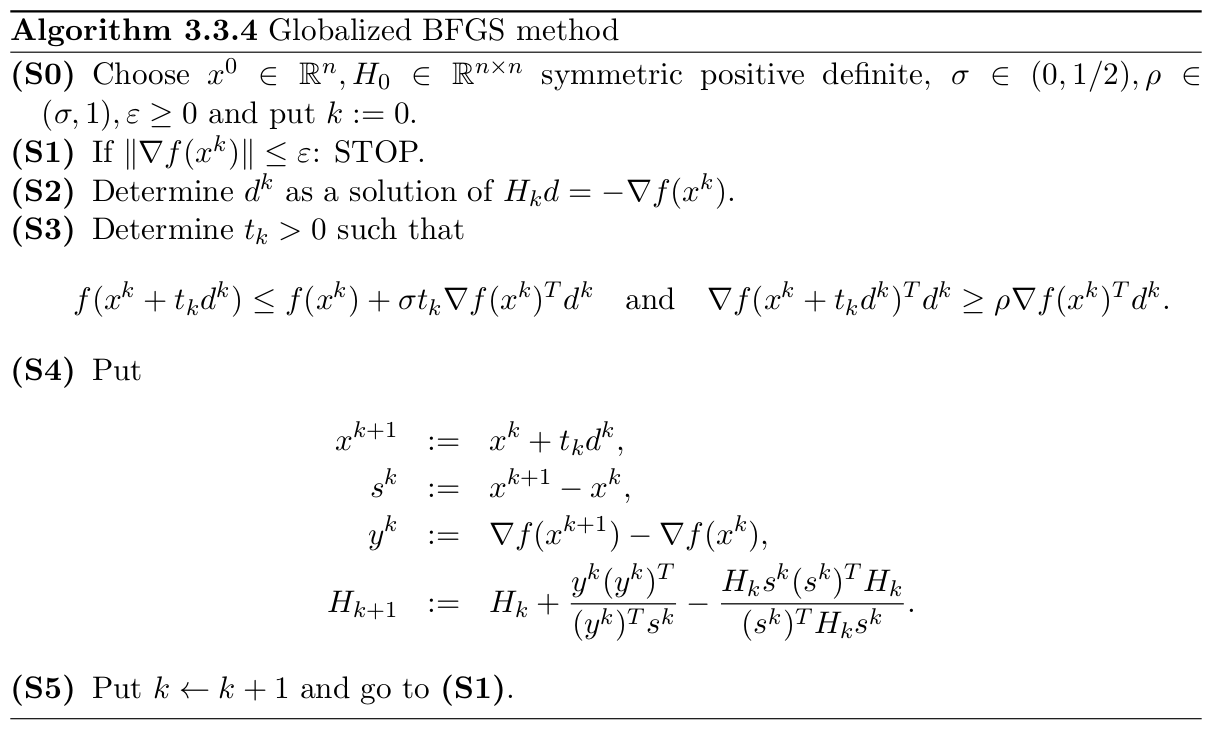

In [7]:
Image(filename='globalized_bfgs_method.png')

## Step Size: Wolfe-Powell Rule
- For an unconstrained minimization problem, the Wolfe Powell rule are a set of inequalities that perform inexact line search.
- This allows for reduction the objective function sufficiently rather than exactly.

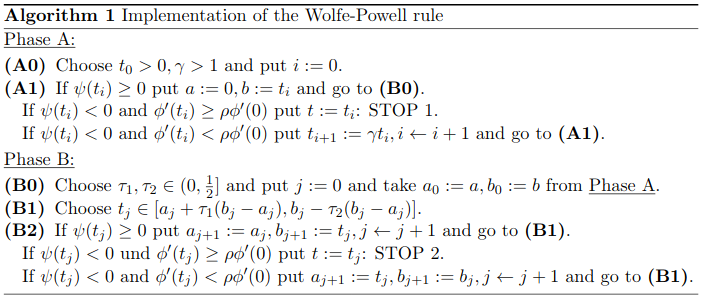

In [8]:
Image(filename='wolfe_powell.png')

## Rosenbrock Function
- Introduced by Howard H. Rosenbrock in 1960, used as a performance test problem for optimization problems.
- The Rosenbrock function $r: \mathbb{R}^2 \rightarrow \mathbb{R}$ is given by:
$$r(x) = 100 (x_2 - x_1^2)^2+ (1 - x_1)^2$$

In [9]:
import numpy as np
from src.function import Function

class Rosenbrock(Function):

    def eval(self, x):
        assert len(x) == 2, '2 dimensional input only.'
        return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2

    def gradient(self, x):
        assert len(x) == 2, '2 dimensional input only.'
        return np.array([
            2 * (-200 * x[0] * x[1] + 200 * np.power(x[0], 3) - 1 + x[0]),
            200 * (x[1] - x[0] ** 2)
        ])

    def hessian(self, x):
        assert len(x) == 2, '2 dimensional input only.'
        df_dx1 = -400 * x[1] + 1200 * x[0] ** 2 + 2
        df_dx1dx2 = -400 * x[0]
        df_dx2dx1 = -400 * x[0]
        df_dx2 = 200

        return np.array([[df_dx1, df_dx1dx2], [df_dx2dx1, df_dx2]])

## Bateman Function

In [10]:
import numpy as np
from src.function import Function

T = np.array([15, 25, 35, 45, 55, 65, 75, 85, 105, 185, 245, 305, 365])
Y = np.array([0.038, 0.085, 0.1, 0.103, 0.093, 0.095, 0.088, 0.08, 0.073, 0.05, 0.038, 0.028, 0.02])


class Bateman(Function):

    def eval(self, x, t_list=T):
        y_x_t = x[2] * (np.exp(-x[0] * t_list) - np.exp(-x[1] * t_list))
        f_raw = np.power(y_x_t - Y, 2)

        return 0.5 * np.sum(f_raw)

    def gradient(self, x):
        y_x_t = x[2] * (np.exp(-x[0] * T) - np.exp(-x[1] * T))

        dx1 = 0
        dx2 = 0
        dx3 = 0
        for i in range(13):
            dx1 = dx1 + (x[2] * -T[i] * (np.exp(-x[0] * T[i]))) * (y_x_t[i] - Y[i])
            dx2 = dx2 + (x[2] * T[i] * np.exp(-x[1] * T[i])) * (y_x_t[i] - Y[i])
            dx3 = dx3 + (np.exp(-x[0] * T[i]) - np.exp(-x[1] * T[i])) * (y_x_t[i] - Y[i])

        return np.array([dx1, dx2, dx3])

    def hessian(self, x):
        pass


## Example
- The parameters will be the following:
$$\beta := 0.5, \sigma := 10^{-4}, \varepsilon := 10^{-4}$$
- Start point will be the following:
$$x^0 := (-1.2, 1)$$

In [11]:
from src.optimizers.bfgs_method import BFGSMethod

objective = Rosenbrock()
starting_point = np.array([-1.2, 1])
H_0 = np.array([[1, 0],
                [0, 1]])

rho = 0.9
sigma = 1e-4
epsilon = 1e-6

optimizer = BFGSMethod()
x = optimizer.optimize(starting_point,
                       H_0,
                       rho,
                       sigma,
                       epsilon,
                       objective)

print(f'Optimal Point: {x}')
print(f'Iterations: {optimizer.iterations}')

Optimal Point: [1.         0.99999999]
Iterations: 34
